# Noisey Data 



Epoch [100/1000], Loss: 0.0118
Epoch [200/1000], Loss: 0.0099
Epoch [300/1000], Loss: 0.0097
Epoch [400/1000], Loss: 0.0097
Epoch [500/1000], Loss: 0.0097


Epoch [600/1000], Loss: 0.0096
Epoch [700/1000], Loss: 0.0096
Epoch [800/1000], Loss: 0.0096
Epoch [900/1000], Loss: 0.0096
Epoch [1000/1000], Loss: 0.0096


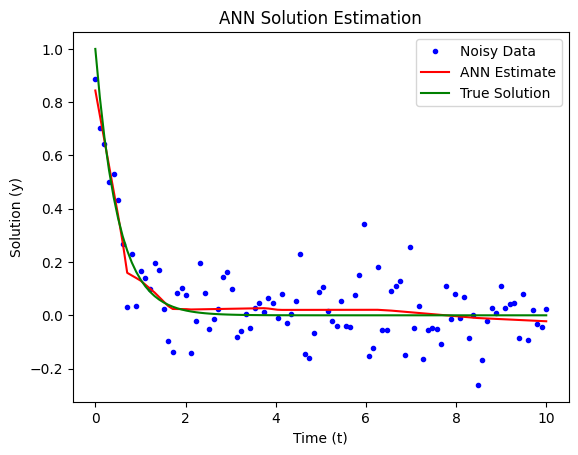

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the initial value problem (IVP)
def f(t, y):
    return -2 * y + torch.sin(t)

# Generate training data
t_data = torch.linspace(0, 10, 100).view(-1, 1)  # Time values
y_data = torch.exp(-2 * t_data)  # True solution to the IVP

# Create a noisy dataset for training
torch.manual_seed(0)
y_data_noisy = y_data + 0.1 * torch.randn_like(y_data)

# Define the neural network model
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.fc(x)

# Initialize the neural network, loss function, and optimizer
model = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the neural network
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(t_data)
    loss = criterion(outputs, y_data_noisy)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Estimate the solution using the trained ANN
with torch.no_grad():
    y_pred = model(t_data)

# Plot the true solution and the ANN's estimate
plt.figure()
plt.plot(t_data.numpy(), y_data_noisy.numpy(), 'b.', label='Noisy Data')
plt.plot(t_data.numpy(), y_pred.numpy(), 'r', label='ANN Estimate')
plt.plot(t_data.numpy(), y_data.numpy(), 'g', label='True Solution')
plt.legend()
plt.xlabel('Time (t)')
plt.ylabel('Solution (y)')
plt.title('ANN Solution Estimation')
plt.show()
